In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-data-for-banking-operations/transaction_data.csv


In [2]:
df= pd.read_csv('/kaggle/input/transaction-data-for-banking-operations/transaction_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

In [3]:
df.head()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",Desktop,Slice3,10,179,3075
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",Mobile,Slice2,11,89,2369
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",Mobile,Slice1,4,53,8039
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",Mobile,Slice3,10,127,6374
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",Mobile,Slice3,20,191,8375


In [4]:
df.isnull().sum()

Transaction ID                      0
Sender Account ID                   0
Receiver Account ID                 0
Transaction Amount                  0
Transaction Type                    0
Timestamp                           0
Transaction Status                  0
Fraud Flag                          0
Geolocation (Latitude/Longitude)    0
Device Used                         0
Network Slice ID                    0
Latency (ms)                        0
Slice Bandwidth (Mbps)              0
PIN Code                            0
dtype: int64

In [5]:
df.describe()

,Transaction Amount,Latency (ms),Slice Bandwidth (Mbps),PIN Code
count,1000.00000,1000.000000,1000.00000,1000.00000
mean,771.16529,11.688000,148.51100,5458.66600
std,411.01925,5.131958,57.78634,2603.03646
min,51.89000,3.000000,50.00000,1000.00000
25%,423.34750,7.000000,98.00000,3281.75000
50%,761.65500,12.000000,148.00000,5385.50000
75%,1122.67250,16.000000,198.25000,7535.00000
max,1497.76000,20.000000,250.00000,9999.00000


In [6]:
# Checking how value counts of the target variable 
df['Fraud Flag'].value_counts()

Fraud Flag
False    519
True     481
Name: count, dtype: int64

## Data Cleaning and Preprocessing
1. Checking if there are any missing values
2. Encoding Categorical Data
3. 

In [7]:
# No missing data to impute
df.isnull().sum().to_frame().rename(columns={0:"Num missing values"})

,Num missing values
Transaction ID,0
Sender Account ID,0
Receiver Account ID,0
Transaction Amount,0
Transaction Type,0
Timestamp,0
Transaction Status,0
Fraud Flag,0
Geolocation (Latitude/Longitude),0
Device Used,0


In [8]:
categorical_cols= df.select_dtypes(include='object').columns
numerical_cols=df.select_dtypes(exclude='object').columns
categorical_cols,numerical_cols

(Index(['Transaction ID', 'Sender Account ID', 'Receiver Account ID',
        'Transaction Type', 'Timestamp', 'Transaction Status',
        'Geolocation (Latitude/Longitude)', 'Device Used', 'Network Slice ID'],
       dtype='object'),
 Index(['Transaction Amount', 'Fraud Flag', 'Latency (ms)',
        'Slice Bandwidth (Mbps)', 'PIN Code'],
       dtype='object'))

In [9]:
#No duplicates
df.drop(['Transaction ID', 'Sender Account ID', 'Receiver Account ID'],axis=1)
df=df.drop_duplicates()
df.shape

(1000, 14)

In [10]:
df['Device Used'].value_counts(),df['Transaction Type'].value_counts(),df['Transaction Status'].value_counts(),df['Network Slice ID'].value_counts()

(Device Used
 Mobile     521
 Desktop    479
 Name: count, dtype: int64,
 Transaction Type
 Transfer      374
 Deposit       316
 Withdrawal    310
 Name: count, dtype: int64,
 Transaction Status
 Failed     513
 Success    487
 Name: count, dtype: int64,
 Network Slice ID
 Slice2    340
 Slice3    337
 Slice1    323
 Name: count, dtype: int64)

In [11]:
le=LabelEncoder()
encode_cols=['Transaction Type', 'Transaction Status','Device Used', 'Network Slice ID']
for col in encode_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
df[numerical_cols].describe()

,Transaction Amount,Latency (ms),Slice Bandwidth (Mbps),PIN Code
count,1000.00000,1000.000000,1000.00000,1000.00000
mean,771.16529,11.688000,148.51100,5458.66600
std,411.01925,5.131958,57.78634,2603.03646
min,51.89000,3.000000,50.00000,1000.00000
25%,423.34750,7.000000,98.00000,3281.75000
50%,761.65500,12.000000,148.00000,5385.50000
75%,1122.67250,16.000000,198.25000,7535.00000
max,1497.76000,20.000000,250.00000,9999.00000


## Exploratory Data Analysis (EDA)
We explore the dataset to uncover patterns and relationships that can guide our modeling. Key areas:

Data distribution for numerical and categorical features.
Missing value analysis.
Correlations between features and target variable. ### Distribution of Numerical Features

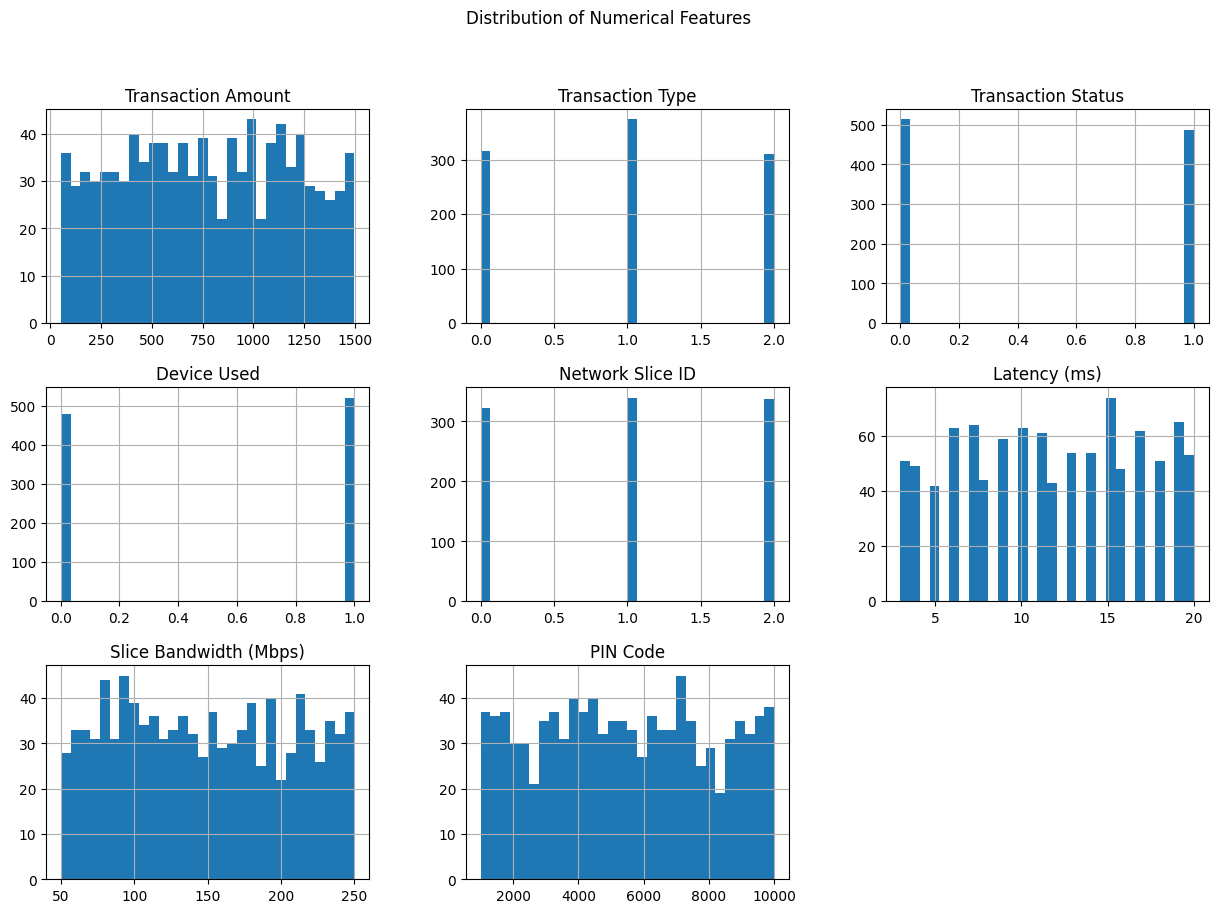

In [13]:
numerical_cols = df.select_dtypes(exclude="object").columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", size=12)
plt.show()

In [14]:
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols].nunique().to_frame().rename(columns={0:"Number of Unique Categories"})

,Number of Unique Categories
Transaction ID,1000
Sender Account ID,994
Receiver Account ID,994
Timestamp,60
Geolocation (Latitude/Longitude),36
